In [1]:
##Revannath Jondhale ## assignment for the Random forest having company data

In [2]:
##importing all libraries

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sb

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
data = pd.read_csv("Company_Data.csv")

In [10]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [11]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
data[data.isnull().any(axis=1)]   #There are no null values in the data.

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


In [14]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [15]:
colnames = list(data.columns)

In [16]:
predictors = colnames[1:]

In [17]:
predictors = colnames[1:]

In [75]:
target = colnames[0]

In [18]:
## let see the boxplot for the given data

<AxesSubplot:>

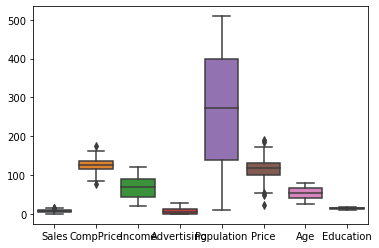

In [19]:
sb.boxplot(data = data)

In [20]:
#There are  plots with the outliers present in same , we will create a function  for finding out these outliers

In [21]:
##using outliers function

In [22]:
outliers=[]

In [24]:
def detect_outlier(data_1): 
    outliers.clear()
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [25]:
# Outliers present in the sales

In [26]:
outlier_sales = detect_outlier(data.Sales)

In [27]:
print(outlier_sales)

[16.27]


In [28]:
len(outlier_sales)

1

In [29]:
# Outliers present in the CompPrice

In [30]:
outlier_compPrice = detect_outlier(data.CompPrice)

In [31]:
print(outlier_compPrice)

[77, 175]


In [32]:
len(outlier_compPrice)

2

In [33]:
# Outliers present in the Price 

In [34]:
outlier_price = detect_outlier(data.Price)

In [35]:
print(outlier_price)

[24, 191]


In [36]:
len(outlier_price)

2

In [37]:
# create  function which will take an index number as input and gives output
#countplot for that particular column

In [38]:
def count_plot(x):
    plot = sb.countplot(x = data.columns[x], data = data, palette = 'hls')
    return plot

In [39]:
#let us see the plot of all the columns in the data

<AxesSubplot:xlabel='Sales', ylabel='count'>

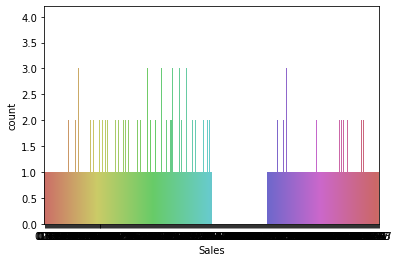

In [40]:
count_plot(0)

<AxesSubplot:xlabel='US', ylabel='count'>

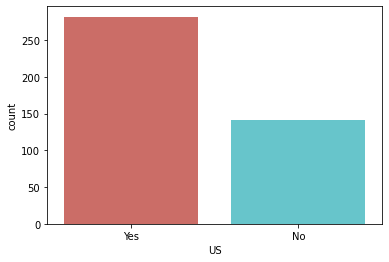

In [42]:
count_plot(1)
count_plot(2)
count_plot(3)
count_plot(4)
count_plot(5)
count_plot(6)
count_plot(7)
count_plot(8)
count_plot(9)
count_plot(10)

In [43]:
#Lets see how a plot against the sales look like

<AxesSubplot:xlabel='Sales'>

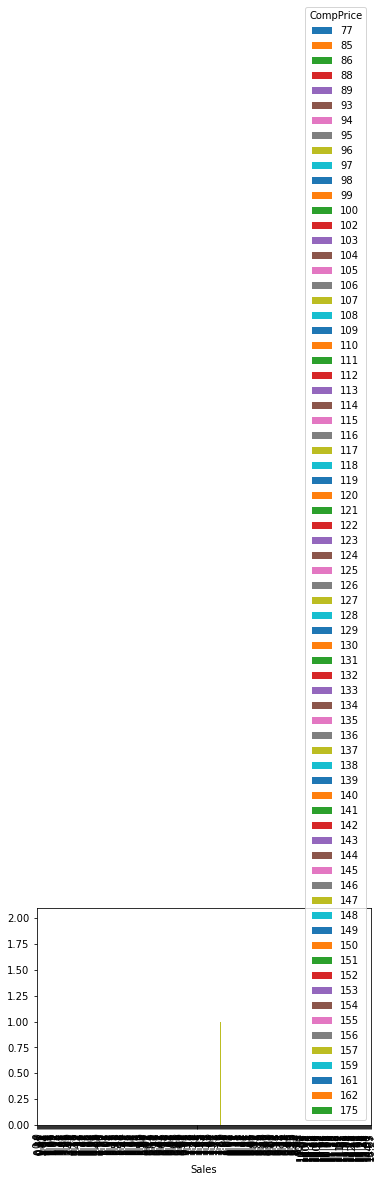

In [44]:
pd.crosstab(data.Sales,data.CompPrice).plot(kind = "bar")

<AxesSubplot:xlabel='Sales'>

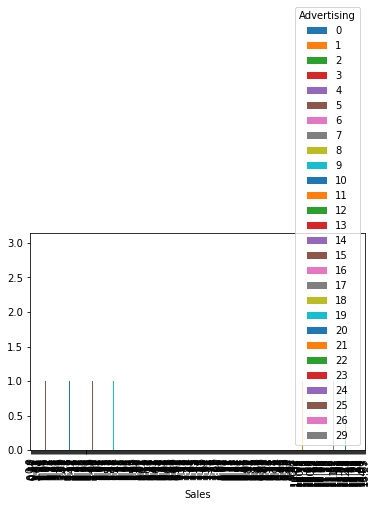

In [45]:
pd.crosstab(data.Sales,data.Advertising).plot(kind = "bar")

<AxesSubplot:xlabel='Sales'>

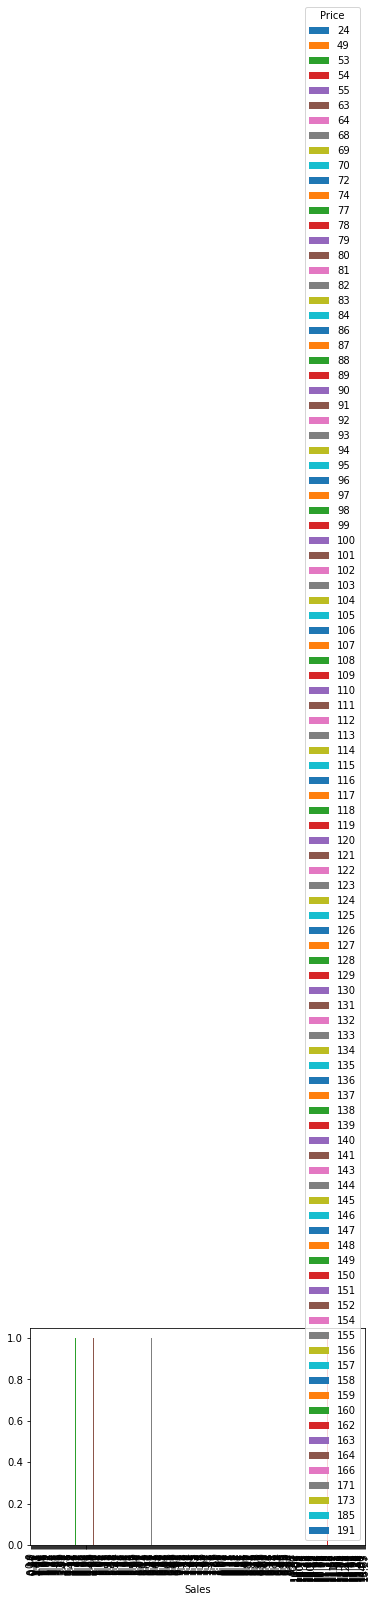

In [46]:
pd.crosstab(data.Sales,data.Price).plot(kind = "bar")

In [47]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [48]:
data["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [49]:
data["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [50]:
data["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [51]:
val_replace = {"ShelveLoc": {"Medium":2, "Bad":3, "Good":1}, "Urban": {"Yes":1, "No":0}, "US": {"Yes":1, "No":0}}

In [52]:
x = data.replace(val_replace).copy()

In [53]:
model_data = x.copy()

In [54]:
model_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [55]:
from sklearn.model_selection import train_test_split

In [76]:
colnames = list(x.columns)

predictors = colnames[1:]

target = colnames[0]

In [77]:
train,test = train_test_split(model_data,test_size = 0.2)

In [78]:
x_train = train[predictors]

In [79]:
y_train = train[target].astype(int)

In [80]:
y_train.dtype

dtype('int32')

In [81]:
x_test = test[predictors]

In [82]:
y_test = test[target].astype(int)

In [83]:
y_test.dtype

dtype('int32')

In [84]:
rf_model = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [85]:
np.shape(model_data)

(400, 11)

In [86]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [87]:
rf_model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1490986808),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1294311004),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2001869750),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=623684403),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1473381585),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=567974510),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1145777178),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=259561324),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
         

In [88]:
rf_model.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [89]:
rf_model.n_classes_

17

In [90]:
rf_model.n_features_

10

In [91]:
rf_model.n_outputs_

1

In [92]:
rf_model.oob_score_

0.109375

In [93]:
# We will first see what is the training accuracy of our model

In [94]:
rf_model.predict(x_train)

array([ 8, 10, 10,  4,  6, 12,  4,  7,  8,  5, 13,  4, 12,  9, 10, 10, 10,
        4, 13,  2,  8,  6,  4,  3,  8, 13, 10,  7, 11,  7, 11, 12,  7,  8,
       10,  5, 12, 11,  5,  6, 11,  6,  9, 10, 10,  4,  9,  5,  9,  1,  8,
        8,  6,  5,  2,  5,  8,  5,  7,  0,  8,  5,  5,  5,  6, 12,  2,  5,
        5,  6, 15,  7,  6,  6,  6,  2,  4,  5,  7,  9, 12, 10,  8, 11,  8,
        7,  7,  7,  6, 12,  4,  7,  8,  3,  8, 10,  6,  5,  8,  5,  5,  5,
        8,  0,  7,  9,  5,  5, 11,  5,  7,  9, 11,  9,  6,  8, 10,  8,  6,
        9, 10,  6,  5, 10,  3, 10,  5,  7,  4,  4,  4,  5,  8,  3,  9,  6,
        4,  3,  7, 10,  7,  4,  7,  9,  9,  8,  9,  8,  4,  6,  5,  5,  9,
        8,  6,  9,  8,  4, 12, 11,  7,  7,  6,  9,  8,  6,  5,  8,  8,  4,
       11,  4,  7, 11,  5,  5,  6,  6,  4,  5,  3,  2,  7,  4,  8,  3, 10,
       12,  8, 11,  5,  4,  4,  3,  6, 11,  4,  4,  7,  3,  4,  9,  8,  5,
        9,  7,  5,  2,  8, 12,  6,  9,  3,  6,  7, 12, 14,  5,  8,  5,  7,
        4,  6,  3,  9, 11

In [95]:
y_train_pred = rf_model.predict(x_train)

In [96]:
y_train.reset_index(drop = True, inplace = True)

In [97]:
print(y_train)

0       8
1      10
2      10
3       5
4       6
       ..
315     7
316     6
317    13
318     9
319     2
Name: Sales, Length: 320, dtype: int32


In [98]:
confusion_matrix(y_train, y_train_pred)

array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  1, 43,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 44,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  

In [99]:
pd.crosstab(y_train, y_train_pred)

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Sales,,,,,,,,,,,,,,,,,
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,43,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0


In [100]:
accuracy_train = np.mean(y_train == y_train_pred)

In [101]:
accuracy_train

0.996875

In [102]:
##predict the test data we have previously created for testing purpose.

In [103]:
rf_model.predict(x_test)

array([ 5,  5,  6,  8,  7,  9,  5,  6,  7,  8, 13,  4,  4, 11,  5,  8,  7,
        3,  6,  6, 10, 13,  5,  4, 11,  4,  5,  4,  1, 12,  4,  4,  4,  5,
        8,  8,  6,  7,  4,  4,  7,  9,  7,  6,  8,  5,  2,  5,  9,  4,  7,
        5,  5, 12,  4,  8, 10,  5,  5,  8,  8,  8,  5,  3,  7,  8,  7,  8,
        8,  6,  4,  8,  4,  9, 11,  7, 11, 12,  5, 10])

In [104]:
y_test_pred = rf_model.predict(x_test)

In [105]:
# Let's plot a confusion matrix for the test data

In [106]:
confusion_matrix(y_test, y_test_pred)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 3, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 3, 4, 1, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 3, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [107]:
# Let's have crosstable for the test data

In [108]:
pd.crosstab(y_test, y_test_pred)

col_0,1,2,3,4,5,6,7,8,9,10,11,12,13
Sales,,,,,,,,,,,,,
2,0,0,0,0,2,0,0,0,0,0,0,0,0
3,0,0,0,2,1,1,0,0,0,0,0,0,0
4,0,0,1,3,2,0,2,1,0,0,0,0,0
5,0,0,0,3,4,1,1,0,0,0,0,0,0
6,1,1,0,3,4,1,2,2,0,0,0,0,0
7,0,0,1,3,1,3,2,1,1,1,0,0,0
8,0,0,0,0,0,0,2,3,1,0,0,0,0
9,0,0,0,0,0,1,0,3,1,1,0,0,0
10,0,0,0,0,1,0,1,2,0,1,2,1,0


In [109]:
# Let's see the accuracy of the test data

In [110]:
accuracy_test = np.mean(y_test == y_test_pred)

In [111]:
accuracy_test*100

20.0

In [ ]:
### %20.00